In [11]:

import matplotlib.pyplot as plt
import np as np
import numpy as np
import pandas as pd
from matplotlib import cm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectPercentile, SelectFromModel, RFE
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV


You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


In [12]:
X_default = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train_default, X_test_default, y_train, y_test = train_test_split(
    X_default, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)
y_train = y_train.ravel()

index_for_removal = np.array(
    [
        0, 10, 14, 17, 25, 26, 35, 39, 49, 59, 62,
    ]
)
X_zero_variance = np.delete(X_default, index_for_removal, 1)
X_train_zero_variance = np.delete(X_train_default, index_for_removal, 1)
X_test_zero_variance = np.delete(X_test_default, index_for_removal, 1)

select_univariate = SelectPercentile(percentile=90)
select_univariate.fit(X_zero_variance, y)
X_univariate = select_univariate.transform(X_zero_variance)
# X_train_univariate = select_univariate.transform(X_train_zero_variance)
# X_test_univariate = select_univariate.transform(X_test_zero_variance)

rf = RandomForestClassifier(
    n_estimators=200,
    max_features=3,
).fit(X_default, y)

select_sfm = SelectFromModel(
    rf,
    threshold='0.1*mean',
)
select_sfm.fit(X_univariate, y)
X_sfm = select_sfm.transform(X_univariate)
# X_test_from_model = select_sfm.transform(X_test_univariate)

select_rfe = RFE(
    RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    n_features_to_select=40
)

select_rfe.fit(X_sfm, y)
X_rfe = select_rfe.transform(X_sfm)
# X_test_iterative = select_rfe.transform(X_test_from_model)

scaler_standard_default = StandardScaler().fit(X_train_default)
X_train_standard_default = scaler_standard_default.transform(X_train_default)
X_test_standard_default = scaler_standard_default.transform(X_test_default)

scaler_standard_variance = StandardScaler().fit(X_train_zero_variance)
X_train_standard_variance = scaler_standard_variance.transform(X_train_zero_variance)
X_test_standard_variance = scaler_standard_variance.transform(X_test_zero_variance)
#
# scaler_standard_refined = StandardScaler().fit(X_train_iterative)
# X_train_standard_refined = scaler_standard_refined.transform(X_train_iterative)
# X_test_standard_refined = scaler_standard_refined.transform(X_test_iterative)


scaler_robust_default = RobustScaler().fit(X_train_default)
X_train_robust_default = scaler_robust_default.transform(X_train_default)
X_test_robust_default = scaler_robust_default.transform(X_test_default)

scaler_robust_variance = RobustScaler().fit(X_train_zero_variance)
X_train_robust_variance = scaler_robust_variance.transform(X_train_zero_variance)
X_test_robust_variance = scaler_robust_variance.transform(X_test_zero_variance)
#
# scaler_robust_refined = RobustScaler().fit(X_train_iterative)
# X_train_robust_refined = scaler_robust_refined.transform(X_train_iterative)
# X_test_robust_refined = scaler_robust_refined.transform(X_test_iterative)

scaler_minmax_default = MinMaxScaler().fit(X_train_default)
X_train_minmax_default = scaler_minmax_default.transform(X_train_default)
X_test_minmax_default = scaler_minmax_default.transform(X_test_default)

scaler_minmax_variance = MinMaxScaler().fit(X_train_zero_variance)
X_train_minmax_variance = scaler_minmax_variance.transform(X_train_zero_variance)
X_test_minmax_variance = scaler_minmax_variance.transform(X_test_zero_variance)

scaler_minmax_refined = MinMaxScaler().fit(X_rfe)
X_minmax_refined = scaler_minmax_refined.transform(X_rfe)
# X_test_minmax_refined = scaler_minmax_refined.transform(X_test_iterative)

pca_default = PCA(n_components=56, random_state=42)
X_train_pca_default = pca_default.fit_transform(X_train_standard_default)
X_test_pca_default = pca_default.transform(X_test_standard_default)

pca_refined = PCA(n_components=37, random_state=42)
# X_train_pca_refined = pca_refined.fit_transform(X_train_standard_refined)
# X_test_pca_refined = pca_refined.transform(X_test_standard_refined)


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/w5/ldwmktd90k7_zc47_06nfmy40000gp/T/ipykernel_17608/1985102883.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_s

In [13]:
def shape_parameters(n_clusters):
    return dict(n_clusters=n_clusters)


def run_grid_kmeans(hyper_parameters, X_data):
    clusterer = KMeans()
    grid_search = GridSearchCV(
        estimator=clusterer,
        param_grid=hyper_parameters,
        cv=2
    )
    grid_search.fit(X_data)

    return grid_search


def display_dendrogram(X_data, linkage_type):
    linkage_array = linkage(X_data, linkage_type)
    # fig = plt.figure(figsize=(128, 32))
    dendro = dendrogram(linkage_array, truncate_mode='level', p=10)
    plt.show(dendro)


def display_images(image_collection, image_indices):
    fig, axes = plt.subplots(ncols=len(image_indices))
    for i in range(0, len(image_indices)):
        ax = axes[i]
        ax.imshow(image_collection[image_indices[i]].reshape(32, 32, 3))
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.tick_params(
            bottom=False, labelbottom=False,
            left=False, labelleft=False
        )
        ax.grid(False)
    plt.show()


def display_silhouette_plot(X_data, agg_labels):
    cluster_labels = np.unique(agg_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_values = silhouette_samples(
        X_data,
        agg_labels,
        metric='euclidean'
    )
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_values = silhouette_values[agg_labels == c]
        c_silhouette_values.sort()
        y_ax_upper += len(c_silhouette_values)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(
            range(y_ax_lower, y_ax_upper),
            c_silhouette_values,
            height=1.0,
            edgecolor='none',
            color=color
        )
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_values)
    silhouette_average = np.mean(silhouette_values)
    plt.axvline(silhouette_average, color='red', linestyle='--')
    plt.yticks(y_ticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.tight_layout()
    plt.show()


def index_from_value(value_list_primary, value_list_refined):
    indices = []
    for val in value_list_refined:
        indices.append(np.where(value_list_primary == val)[0][0])
    return indices

def get_core_indices(silhouette_values, pred_labels, core):
    core_silhouettes = silhouette_values[pred_labels == core]
    core_silhouettes = np.sort(core_silhouettes)[::-1][0:5]
    return index_from_value(silhouette_values, core_silhouettes)

def get_boundary_indices(silhouette_values, pred_labels, core):
    core_silhouettes = silhouette_values[pred_labels == core]
    boundary_silhouettes = list(filter(lambda _silhouette: -.001 < _silhouette < 0.001, core_silhouettes))
    return index_from_value(silhouette_values, boundary_silhouettes)


## Ward linkage

ward dendrogram

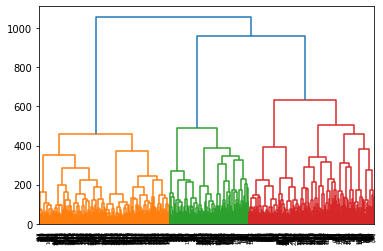

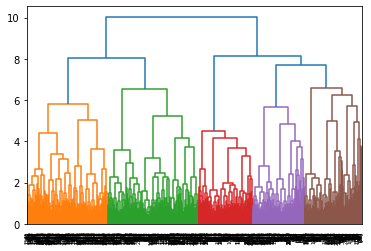

In [14]:
# pca = PCA(n_components=56, random_state=42)
# X_pca = pca.fit_transform(X_standard)

display_dendrogram(X_default, 'ward')
display_dendrogram(X_minmax_refined, 'ward')


wrad silhouette

In [30]:
agg_ward = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'
)
y_agg_ward = agg_ward.fit_predict(X)

## ward standard scaler

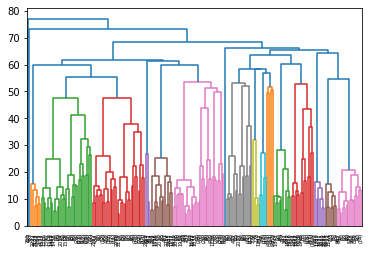

In [4]:
display_dendrogram(X_standard, 'ward')


In [18]:
agg_ward_scaled_standard = AgglomerativeClustering(
    n_clusters=9,
    linkage='ward'
)
y_agg_ward_scaled_standard = agg_ward_scaled_standard.fit_predict(X_minmax_refined)

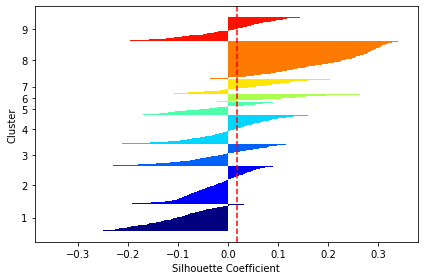

In [19]:
display_silhouette_plot(X_data=X_minmax_refined, agg_labels=y_agg_ward_scaled_standard)

## ward minmax scaler

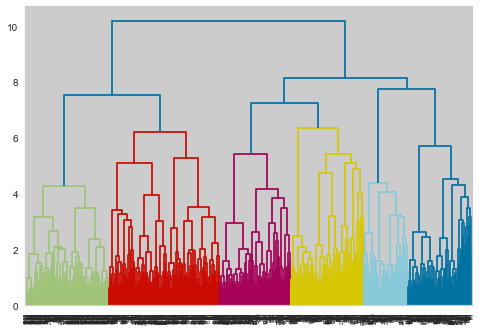

In [48]:
display_dendrogram(X_minmax, 'ward')


In [49]:
agg_ward_scaled_minmax = AgglomerativeClustering(
    n_clusters=8,
    linkage='ward'
)
y_agg_ward_scaled_minmax = agg_ward_scaled_minmax.fit_predict(X_minmax)

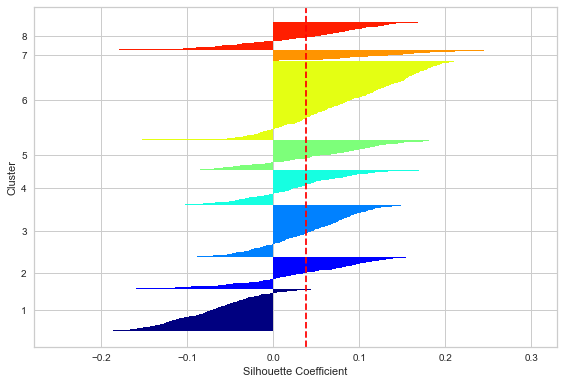

In [50]:
display_silhouette_plot(X_data=X_minmax, agg_labels=y_agg_ward_scaled_minmax)


## Singe-link
dendrogram

9000


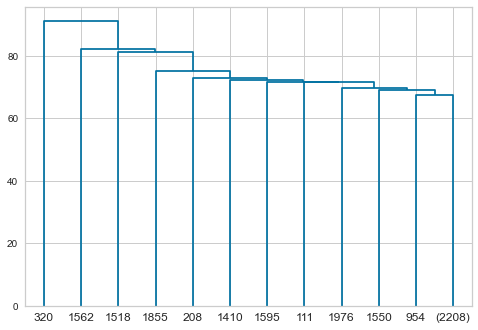

In [9]:
import sys
sys.setrecursionlimit(9000)
print(sys.getrecursionlimit())

display_dendrogram(X, 'single')
sys.setrecursionlimit(1000)


single silhouette

In [21]:
import sys
sys.setrecursionlimit(10000)

agg_single = AgglomerativeClustering(
    linkage='single',
    n_clusters=9
)
y_agg_single = agg_single.fit_predict(X)

sys.setrecursionlimit(1000)


In [11]:
print(np.unique(y_agg_single))
# np.sum(y_agg_single[] == 0)
print(y_agg_single)

silhouette_values = silhouette_samples(
        X,
        y_agg_single,
        metric='euclidean'
)

c_silhouette_values = silhouette_values[y_agg_single == 1]
print(len(c_silhouette_values))

[0 1]
[0 0 0 ... 0 0 0]
1


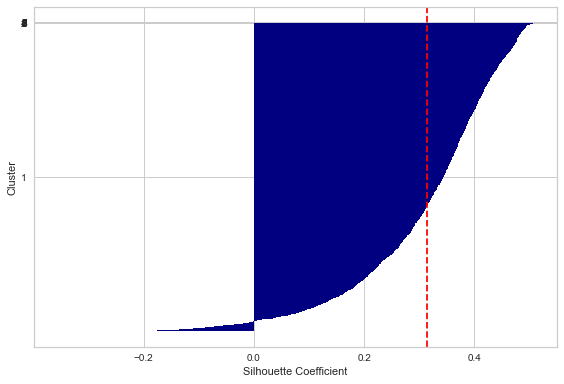

In [22]:
display_silhouette_plot(X_data=X, agg_labels=y_agg_single)


9000


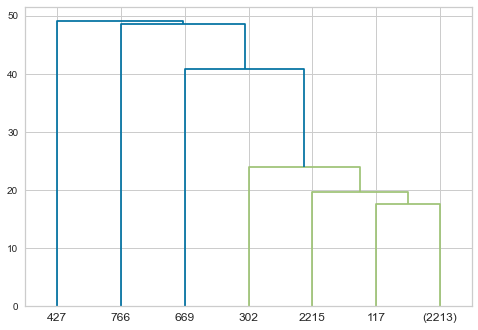

In [45]:
import sys
sys.setrecursionlimit(9000)
print(sys.getrecursionlimit())

display_dendrogram(X_standard, 'single')
sys.setrecursionlimit(1000)


In [ ]:

import sys
sys.setrecursionlimit(10000)

agg_single = AgglomerativeClustering(
    linkage='single',
    n_clusters=13
)
y_agg_single = agg_single.fit_predict(X)

sys.setrecursionlimit(1000)


## Complete linkage

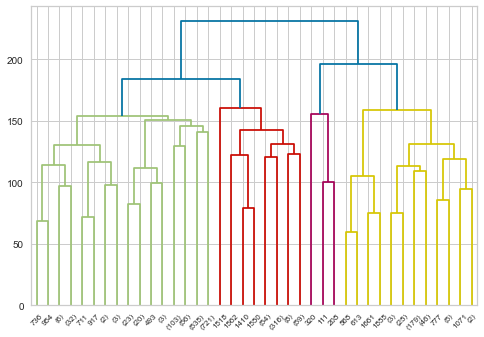

In [26]:
display_dendrogram(X, 'complete')

In [20]:
agg_complete = AgglomerativeClustering(
    n_clusters=9,
    linkage='complete'
)
y_agg_complete = agg_complete.fit_predict(X_default)

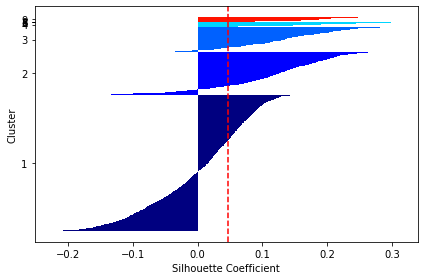

In [21]:
display_silhouette_plot(X_data=X_default, agg_labels=y_agg_complete)

In [22]:
agg_complete = AgglomerativeClustering(
    n_clusters=9,
    linkage='complete'
)
y_agg_complete = agg_complete.fit_predict(X_minmax_refined)

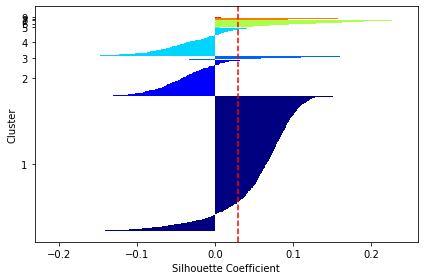

In [23]:
display_silhouette_plot(X_data=X_minmax_refined, agg_labels=y_agg_complete)


In [16]:
# cluster_labels = np.unique(y_agg_ward)
# n_clusters = cluster_labels.shape[0]
silhouette_values = silhouette_samples(
    X,
    y_agg_complete,
    metric='euclidean'
)

seek silhouette values at core and boundary

finding the actual samples that are core and boundary

In [17]:
indices_at_core_0 = get_core_indices(silhouette_values, y_agg_complete, core=0)
print(indices_at_core_0)


[151, 233, 56, 160, 309]


In [18]:

display_images(images, indices_at_core_0)

# display_images(images, boundary_indices)

NameError: name 'images' is not defined

In [ ]:
indices_at_core_1 = get_core_indices(silhouette_values, y_agg_complete, core=1)
print(indices_at_core_1)


In [ ]:
display_images(images, indices_at_core_1)


In [ ]:
indices_at_core_2 = get_core_indices(silhouette_values, y_agg_complete, core=2)
print(indices_at_core_2)

In [ ]:
display_images(images, indices_at_core_2)

In [ ]:
indices_at_core_3 = get_core_indices(silhouette_values, y_agg_complete, core=3)
print(indices_at_core_3)



In [ ]:
display_images(images, indices_at_core_3)

In [ ]:
indices_at_core_4 = get_core_indices(silhouette_values, y_agg_complete, core=4)
print(indices_at_core_4)

In [ ]:
display_images(images, indices_at_core_4)

In [ ]:
indices_at_boundary_1 = get_boundary_indices(silhouette_values=silhouette_values, pred_labels=y_agg_complete, core=1)
print(indices_at_boundary_1)

In [ ]:
display_images(images, indices_at_boundary_1[5:10])


In [ ]:
indices_at_boundary_0 = get_boundary_indices(silhouette_values=silhouette_values, pred_labels=y_agg_complete, core=0)
print(indices_at_boundary_0)


In [ ]:
display_images(images, indices_at_boundary_0[0:2])


In [ ]:
indices_at_boundary_1 = get_boundary_indices(silhouette_values=silhouette_values, pred_labels=y_agg_complete, core=1)
print(indices_at_boundary_1)


In [ ]:
display_images(images, indices_at_boundary_1[0:5])

In [ ]:
indices_at_boundary_3 = get_boundary_indices(silhouette_values=silhouette_values, pred_labels=y_agg_complete, core=3)
print(indices_at_boundary_3)


In [ ]:
display_images(images, indices_at_boundary_3[0:5])

In [ ]:
indices_at_boundary_4 = get_boundary_indices(silhouette_values=silhouette_values, pred_labels=y_agg_complete, core=4)
print(indices_at_boundary_4)


In [ ]:
display_images(images, indices_at_boundary_4[0:5])

In [ ]:
display_images(images, indices_at_boundary_4[5:10])